In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import csv
import seaborn as sb
sb.set_style('whitegrid')
sb.set()

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Amazon Book Selling Review\bestsellers with categories.csv", encoding = "latin1")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.shape

(550, 7)

In [5]:
df.rename(columns = {"User Rating": "User_Rating"}, inplace = True)

In [6]:
bookName = df.groupby("Name", as_index = False).agg({"Price": "sum"}).sort_values("Price", ascending = False).rename(columns = {"Price": "sum_price"})[::5]

In [7]:
bookName.head()

,Name,sum_price
191,Publication Manual of the American Psychologic...,460
216,The 5 Love Languages: The Secret to Love That ...,140
178,"Oh, the Places You'll Go!",64
228,The Book of Basketball: The NBA According to T...,53
348,Wonder,45


In [8]:
user_ratings = df.groupby("Author", as_index = False).agg({"User_Rating": "sum"}).sort_values("User_Rating", ascending = False).head(10)
user_ratings

,Author,User_Rating
120,Jeff Kinney,57.6
197,Rick Riordan,52.5
92,Gary Chapman,52.1
226,Suzanne Collins,51.3
11,American Psychological Association,45.0
73,Dr. Seuss,43.9
199,Rob Elliott,36.5
90,Gallup,36.0
58,Dav Pilkey,34.3
83,Eric Carle,34.3


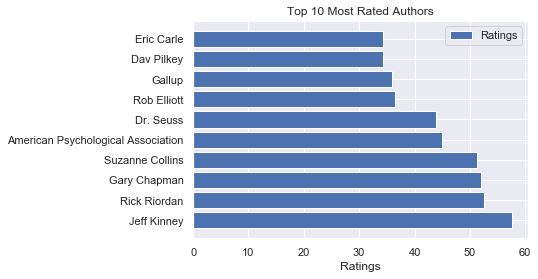

In [9]:
plt.barh(user_ratings["Author"], user_ratings["User_Rating"], label = "Ratings")
plt.title("Top 10 Most Rated Authors")
plt.xlabel("Ratings")
plt.legend()
plt.show()

In [10]:
reviews = df.groupby("Name", as_index = False).agg({"Reviews": "sum"}).sort_values("Reviews", ascending = False)
reviews.head(10)

,Name,Reviews
240,The Fault in Our Stars,201928
178,"Oh, the Places You'll Go!",174672
104,Gone Girl,171813
248,The Girl on the Train,158892
328,"Unbroken: A World War II Story of Survival, Re...",148365
243,The Four Agreements: A Practical Guide to Pers...,139848
310,The Very Hungry Caterpillar,136822
322,To Kill a Mockingbird,131170
217,The 5 Love Languages: The Secret to Love that ...,127770
125,How to Win Friends & Influence People,125005


In [11]:
author_query = df.query('Genre == "Fiction"')
author_query

,Name,Author,User_Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


In [12]:
genreCost = df.groupby("Genre", as_index = False).agg({"Price": "sum"}).sort_values("Price", ascending = False).rename(columns = {"Price": "Cost_Analysis"})
genreCost.head()

,Genre,Cost_Analysis
1,Non Fiction,4601
0,Fiction,2604


In [13]:
maxCost = df.groupby(["Name", "Author", "User_Rating"] , as_index = False).agg({"Price": "min"}).sort_values("Price", ascending = False).head()
maxCost

,Name,Author,User_Rating,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,105
308,The Twilight Saga Collection,Stephenie Meyer,4.7,82
112,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,54
229,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,53
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,52


In [14]:
minRatings = df.groupby(["Author", "Name", "Price"], as_index = False).agg({"User_Rating": "min"}).sort_values("User_Rating", ascending = True).head(10)
minRatings

,Author,Name,Price,User_Rating
154,J.K. Rowling,The Casual Vacancy,12,3.3
135,Harper Lee,Go Set a Watchman: A Novel,19,3.6
100,E L James,Fifty Shades of Grey: Book One of the Fifty Sh...,14,3.8
90,Donna Tartt,The Goldfinch: A Novel (Pulitzer Prize for Fic...,20,3.9
350,Veronica Roth,Allegiant,13,3.9
151,J.K. Rowling,"Harry Potter and the Cursed Child, Parts 1 & 2...",12,4.0
240,Muriel Barbery,The Elegance of the Hedgehog,11,4.0
129,Gillian Flynn,Gone Girl,10,4.0
128,Gillian Flynn,Gone Girl,9,4.0
115,Gallup,StrengthsFinder 2.0,17,4.0


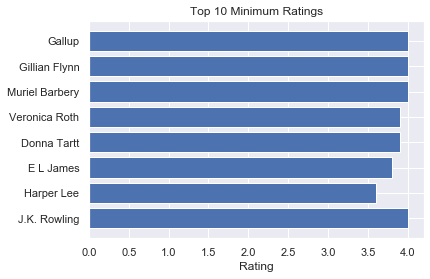

In [15]:
plt.barh(minRatings["Author"], minRatings["User_Rating"])
plt.title("Top 10 Minimum Ratings")
plt.xlabel("Rating")
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User_Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [17]:
df["Author"].value_counts()

Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Raina Telgemeier                       1
Eric Larson                            1
Tucker Carlson                         1
Jay Asher                              1
Keith Richards                         1
Name: Author, Length: 248, dtype: int64

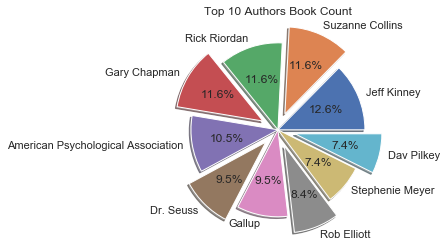

In [20]:
with open(r"D:\Open Classroom\Datasets\Amazon Book Selling Review\bestsellers with categories.csv", encoding = "utf-8") as amazon:
    amazonReader = csv.DictReader(amazon)
    amazonCounter = Counter()
    
    for rec in amazonReader:
        amazonCounter.update(rec["Author"].split("/"))
        
        #for i in amazonCounter:
           # books = i.["Price"].count()
            #print(books)
           # break
#print(amazonCounter.most_common())

author = []
total_books = []
for i in amazonCounter.most_common(10):
    author.append(i[0])
    total_books.append(i[1])
#print(author)
year = df["Year"].head(10)
reviews = df["Reviews"].head(10)
price = df["Price"].head(10)


#Pie Plotting
explode = [0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2]
plt.pie(total_books, labels = author, autopct = "%1.1f%%", shadow = True, explode = explode)
plt.title("Top 10 Authors Book Count")

#Scatter Plotting
##plt.scatter(reviews, total_books, s = year, c = year, cmap = "viridis", edgecolor = "black")
##cbar = plt.colorbar()
##cbar.set_label("Year")
##plt.xscale("log")
##plt.yscale("log")
plt.show()